<a href="https://colab.research.google.com/github/Markushenriksson13/Markushenriksson-AAUBDS-2024/blob/main/Assignment_3_(DONE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cleaning and importing

In [1]:
!pip install umap-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.6 MB/s eta 0:00:00


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import umap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans

sns.set()

In [3]:
# Clone repository from GitHub
!git clone https://github.com/aaubs/ds-master.git


Cloning into 'ds-master'...
remote: Enumerating objects: 3065, done.
remote: Counting objects: 100% (1345/1345), done.
remote: Compressing objects: 100% (532/532), done.
remote: Total 3065 (delta 995), reused 1097 (delta 807), pack-reused 1720 (from 1)
Receiving objects: 100% (3065/3065), 282.06 MiB | 13.02 MiB/s, done.
Resolving deltas: 100% (1790/1790), done.
Updating files: 100% (457/457), done.


In [4]:
import os

# Locate the correct filepath
os.chdir('/content/ds-master/data/assignments_datasets/KIVA')

# Check to see if the datasets are there
!ls



kiva_loans_part_0.csv.zip  kiva_loans_part_2.csv.zip	  loan_theme_ids.csv.zip
kiva_loans_part_1.csv.zip  kiva_mpi_region_locations.csv  loan_themes_by_region.csv


In [5]:
import zipfile

# Extract the zipfiles
with zipfile.ZipFile('kiva_loans_part_0.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()
with zipfile.ZipFile('kiva_loans_part_1.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()
with zipfile.ZipFile('kiva_loans_part_2.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()
with zipfile.ZipFile('loan_theme_ids.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
#Load them into pandas dataframes
df_part_0 = pd.read_csv('kiva_loans_part_0.csv')
df_part_1 = pd.read_csv('kiva_loans_part_1.csv')
df_part_2 = pd.read_csv('kiva_loans_part_2.csv')
df_mpi_region = pd.read_csv('kiva_mpi_region_locations.csv')
df_loan_theme_ids = pd.read_csv('loan_theme_ids.csv')
df_loan_themes_by_region = pd.read_csv('loan_themes_by_region.csv')

In [7]:
#Check if the columns makes sense
df_part_0.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

## 2. Data Cleaning and manipulation

In [8]:
#Concatonating the dataset
data = pd.concat([df_part_0, df_part_1, df_part_2])
#Using head to get an overview of the data
data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [9]:
data.shape

(671205, 20)

In [10]:
#Making sure they are dropped correctly
data.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [11]:
# Reshaping categorical variables into numerical variables
from sklearn.preprocessing import LabelEncoder

#Creatning incoder instance
encoder_activity = LabelEncoder()
encoder_sector = LabelEncoder()
encoder_genders = LabelEncoder()
encoder_country = LabelEncoder()
encoder_repayment = LabelEncoder()

# Transforming the columns
data['encoded_activity'] = encoder_activity.fit_transform(data['activity'])
data['encoded_sector'] = encoder_sector.fit_transform(data['sector'])
data['encoded_borrower_genders'] = encoder_genders.fit_transform(data['borrower_genders'])
data['encoded_country'] = encoder_country.fit_transform(data['country'])
data['encoded_repayment_interval'] = encoder_repayment.fit_transform(data['repayment_interval'])

# Checking Results
print(data[['activity', 'encoded_activity', 'sector', 'encoded_sector', 'borrower_genders', 'encoded_borrower_genders', 'country', 'encoded_country', 'repayment_interval', 'encoded_repayment_interval']].head())


              activity  encoded_activity          sector  encoded_sector  \
0  Fruits & Vegetables                67            Food               6   
1             Rickshaw               134  Transportation              13   
2       Transportation               148  Transportation              13   
3           Embroidery                52            Arts               1   
4           Milk Sales                95            Food               6   

  borrower_genders  encoded_borrower_genders   country  encoded_country  \
0           female                         0  Pakistan               54   
1   female, female                         1  Pakistan               54   
2           female                         0     India               29   
3           female                         0  Pakistan               54   
4           female                         0  Pakistan               54   

  repayment_interval  encoded_repayment_interval  
0          irregular                     

In [12]:
# We would like to also include the time/duration between posted_time and funded_time - in other words: how long it takes to get a loan funded
# convert to pd.datetime
data['posted_time'] = pd.to_datetime(data['posted_time'])
data['funded_time'] = pd.to_datetime(data['funded_time'])

# calculate time between posted_time and funded_time
data['funding_duration'] = data['funded_time'] - data['posted_time']

# the result in days instead of a timedelta
data['funding_duration_days'] = (data['funded_time'] - data['posted_time']).dt.total_seconds() / (24 * 60 * 60)

# first rows to check
print(data[['posted_time', 'funded_time', 'funding_duration', 'funding_duration_days']].head())


                posted_time               funded_time funding_duration  \
0 2014-01-01 06:12:39+00:00 2014-01-02 10:06:32+00:00  1 days 03:53:53   
1 2014-01-01 06:51:08+00:00 2014-01-02 09:17:23+00:00  1 days 02:26:15   
2 2014-01-01 09:58:07+00:00 2014-01-01 16:01:36+00:00  0 days 06:03:29   
3 2014-01-01 08:03:11+00:00 2014-01-01 13:00:00+00:00  0 days 04:56:49   
4 2014-01-01 11:53:19+00:00 2014-01-01 19:18:51+00:00  0 days 07:25:32   

   funding_duration_days  
0               1.162419  
1               1.101562  
2               0.252419  
3               0.206123  
4               0.309398  


In [13]:
#Dropping columns that are not needed
data_cleaned = data.drop(['use', 'region', 'currency', 'id', 'partner_id', 'disbursed_time', 'tags', 'country_code', 'region', 'date', 'activity', 'sector', 'borrower_genders', 'country', 'repayment_interval', 'posted_time', 'funded_time', 'funding_duration'], axis=1)

In [14]:
data_cleaned.head()

,funded_amount,loan_amount,term_in_months,lender_count,encoded_activity,encoded_sector,encoded_borrower_genders,encoded_country,encoded_repayment_interval,funding_duration_days
0,300.0,300.0,12.0,12,67,6,0,54,1,1.162419
1,575.0,575.0,11.0,14,134,13,1,54,1,1.101562
2,150.0,150.0,43.0,6,148,13,0,29,0,0.252419
3,200.0,200.0,11.0,8,52,1,0,54,1,0.206123
4,400.0,400.0,14.0,16,95,6,0,54,2,0.309398


In [15]:
#Dropping missing values
data_cleaned.dropna(inplace=True)

In [16]:
data_cleaned.isna().sum()

,0
funded_amount,0
loan_amount,0
term_in_months,0
lender_count,0
encoded_activity,0
encoded_sector,0
encoded_borrower_genders,0
encoded_country,0
encoded_repayment_interval,0
funding_duration_days,0


In [17]:
#Making a sample, as the dataframe is too large to perform this UML proces
data_cleaned = data_cleaned.sample(n=5000)


In [18]:
data_cleaned.head()

,funded_amount,loan_amount,term_in_months,lender_count,encoded_activity,encoded_sector,encoded_borrower_genders,encoded_country,encoded_repayment_interval,funding_duration_days
167514,3725.0,3725.0,14.0,52,77,4,0,57,2,3.635509
90113,875.0,875.0,8.0,22,34,2,2,52,1,18.182060
110777,275.0,275.0,14.0,9,113,7,6904,71,2,0.569572
60402,625.0,625.0,14.0,15,120,0,0,59,1,32.680822
171567,1100.0,1100.0,80.0,27,77,4,0,36,1,3.864074


In [50]:
data.dropna(inplace=True)

In [51]:
# Also making a sample of the non-converted df with categorical varibes
data_sampled = data.sample(n=5000)

In [52]:
data_sampled.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,borrower_genders,repayment_interval,date,encoded_activity,encoded_sector,encoded_borrower_genders,encoded_country,encoded_repayment_interval,funding_duration,funding_duration_days
68158,940274,400.0,400.0,Higher education costs,Education,to pay university fees.,PY,Paraguay,PILAR,PYG,...,female,monthly,2015-08-28,77,4,0,57,2,3 days 04:40:27,3.194757
219799,1335094,75.0,75.0,Home Energy,Personal Use,to buy a solar lantern.,KE,Kenya,Nyahururu,KES,...,female,monthly,2017-07-06,79,10,0,34,2,9 days 02:51:07,9.118831
51015,923230,225.0,225.0,Fishing,Food,to buy fishing nets,PH,Philippines,"Moalboal, Cebu",PHP,...,female,irregular,2015-07-26,60,6,0,59,1,8 days 04:46:40,8.199074
81223,733155,2775.0,2775.0,Dairy,Agriculture,to purchase a cow and fodder and to build a co...,IN,India,"Kesinga, Odisha",INR,...,"female, female, female, female, female, female...",bullet,2014-07-01,44,0,10,29,0,10 days 03:50:28,10.160046
107924,1218480,300.0,300.0,Motorcycle Transport,Transportation,"to purchase spare parts, body, and repairs for...",PK,Pakistan,Gujranwala,PKR,...,female,monthly,2017-01-11,99,13,0,54,2,29 days 13:24:28,29.558657


# Preproces for UML (normalization & feature selection)

In [53]:
#Locating the only variables that are needed for the proces
data_to_cluster = data_cleaned.iloc[:, :10]


In [54]:
data_to_cluster.head()

,funded_amount,loan_amount,term_in_months,lender_count,encoded_activity,encoded_sector,encoded_borrower_genders,encoded_country,encoded_repayment_interval,funding_duration_days
167514,3725.0,3725.0,14.0,52,77,4,0,57,2,3.635509
90113,875.0,875.0,8.0,22,34,2,2,52,1,18.182060
110777,275.0,275.0,14.0,9,113,7,6904,71,2,0.569572
60402,625.0,625.0,14.0,15,120,0,0,59,1,32.680822
171567,1100.0,1100.0,80.0,27,77,4,0,36,1,3.864074


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
# learn x-y relationships (principal components) and transform
# Scaling the data (prep)
data_to_cluster_scaled = scaler.fit_transform(data_to_cluster)

In [57]:

from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()

In [58]:
data_to_cluster_minmax = scaler_min_max.fit_transform(data_to_cluster)

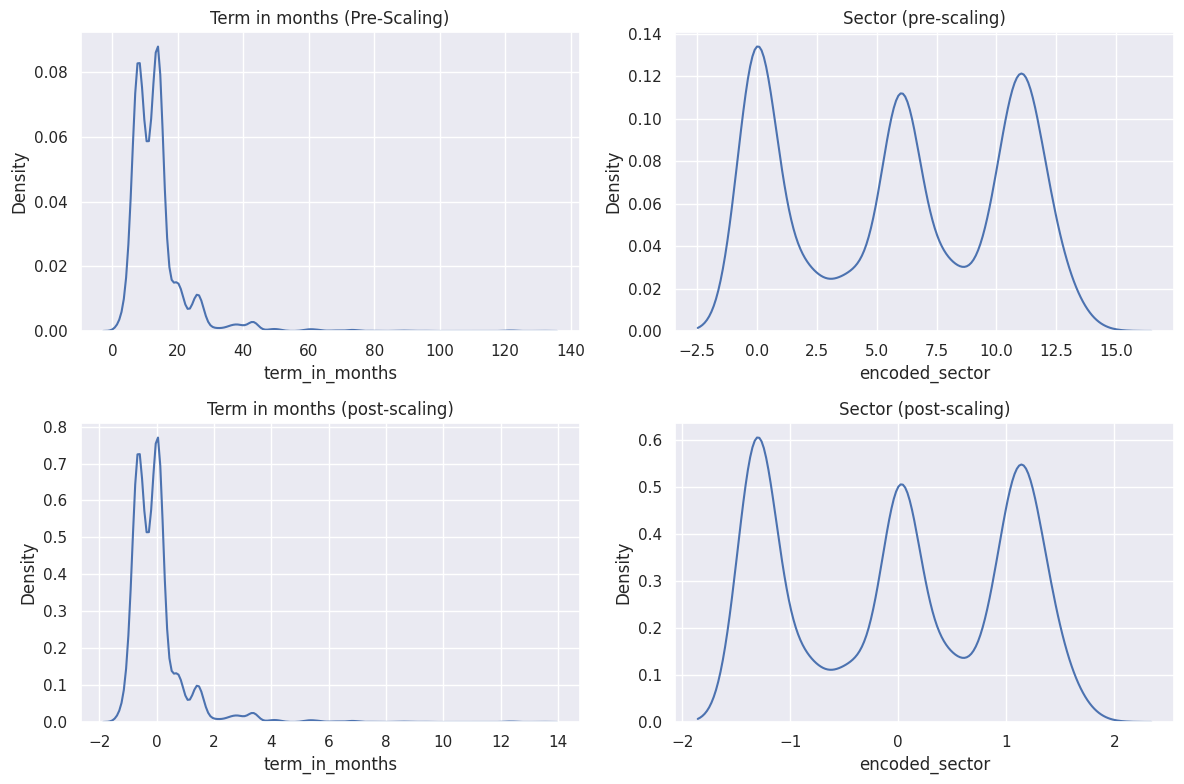

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Term in months (pre-scaling)
sns.kdeplot(data=data_to_cluster, x="term_in_months", ax=axes[0, 0])
axes[0, 0].set_title("Term in months (Pre-Scaling)")

# Sector (pre-scaling)
sns.kdeplot(data=data_to_cluster, x="encoded_sector", ax=axes[0, 1])
axes[0, 1].set_title("Sector (pre-scaling)")

# convert scaled data to dataframe
scaled_df = pd.DataFrame(data_to_cluster_scaled, columns=data_to_cluster.columns)

# Term in months (post-scaling)
sns.kdeplot(data=scaled_df, x="term_in_months", ax=axes[1, 0])
axes[1, 0].set_title("Term in months (post-scaling)")

# Sector (post-scaling)
sns.kdeplot(data=scaled_df, x="encoded_sector", ax=axes[1, 1])
axes[1, 1].set_title("Sector (post-scaling)")

plt.tight_layout()
plt.show()

# Dimensionality reduction

# PCA (Reduction)

In [60]:
# load up and instantiate PCA
pca = PCA(n_components=2)

In [61]:
# Transform the data
data_reduced_pca = pca.fit_transform(data_to_cluster_scaled)
pca.components_.shape

(2, 10)

In [62]:
# Transform the data
X_pca_2d = pca.fit_transform(data_to_cluster_scaled)


In [63]:
# How much information is lost?
print(pca.explained_variance_ratio_)

[0.29756865 0.14749319]


<Axes: >

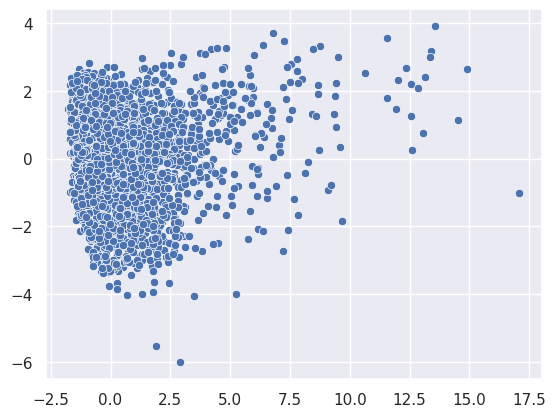

In [64]:
sns.scatterplot(x=data_reduced_pca[:,0], y=data_reduced_pca[:,1])

In [65]:
# Create a new DataFrame based on the reduced data from PCA
vis_data = pd.DataFrame(data_reduced_pca)

# Add 'sector' column from the original 'data' DataFrame to 'vis_data'
# Reset the index of both DataFrames to ensure alignment and avoid potential conflicts from duplicate indices
vis_data['sector'] = data.reset_index()['sector']

# Add 'country' column, represented by its alpha-2 code, from the original 'data' DataFrame to 'vis_data'
vis_data['country'] = data.reset_index()['country']


# Rename the columns of 'vis_data' for better clarity:
# The first two columns represent the two principal components from PCA
# The third and fourth columns are 'place' and 'country' respectively
vis_data.columns = ['x', 'y', 'sector', 'country']

# Using the Altair library to create an interactive scatter plot:
# - The x and y axes represent the two principal components.
# - Each data point (or circle) in the scatter plot corresponds to a 'place' in a 'country'.
# - Hovering over a data point reveals a tooltip with the 'place' and 'country' information.
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',          # Set the x-axis to represent the first principal component
    y='y',          # Set the y-axis to represent the second principal component
    tooltip=['sector', 'country']  # Display 'place' and 'country' information as a tooltip on hover
).interactive()   # Enable interactive features such as panning and zooming


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

<Axes: >

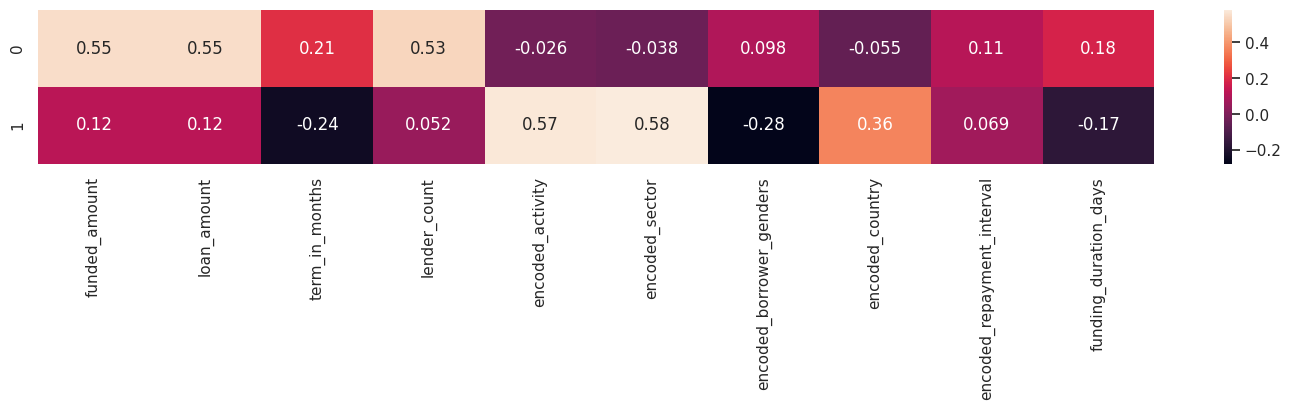

In [66]:
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=data_to_cluster.columns), annot=True)

<Axes: >

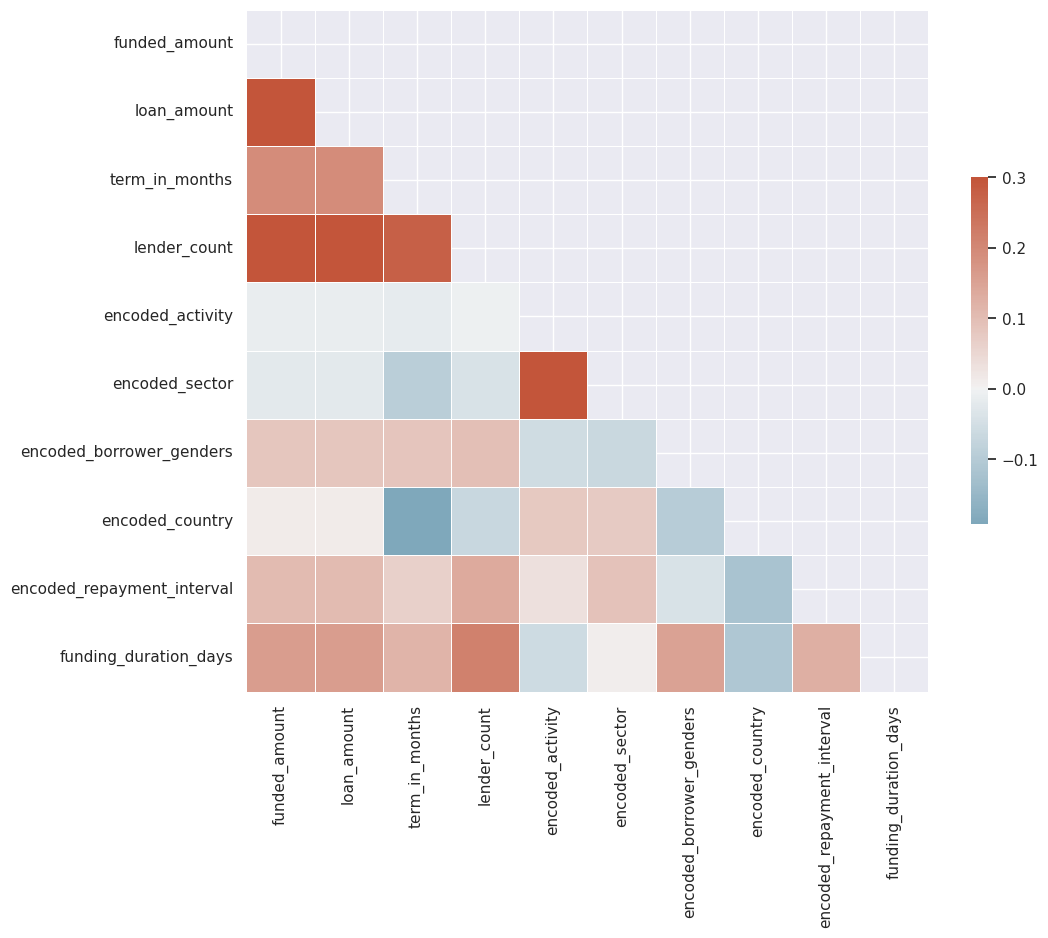

In [67]:
#Correlation between variables

# Compute the correlation matrix
corr = data_to_cluster.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [68]:
pca.components_

array([[ 0.55255936,  0.55255936,  0.20947962,  0.53462675, -0.02615473,
        -0.03790415,  0.09831005, -0.05541765,  0.11267759,  0.17915304],
       [ 0.11797999,  0.11797999, -0.23947999,  0.05153255,  0.57374756,
         0.58301032, -0.27561369,  0.36357923,  0.06855168, -0.17382687]])

# NMF (Reduction)

In [69]:
# import nmf
from sklearn.decomposition import NMF

In [70]:
# instantiate with 4 components
nmf = NMF(n_components=4)

In [71]:
# Using the min-max scaled data
data_reduced_nmf = nmf.fit_transform(data_to_cluster_minmax)

In [72]:
#Showing off the initial shape
data_to_cluster_minmax.shape

(5000, 10)

In [73]:
data_reduced_nmf.shape

(5000, 4)

In [74]:
#Checking the components of the nmf
nmf.components_.shape

(4, 10)

<Axes: >

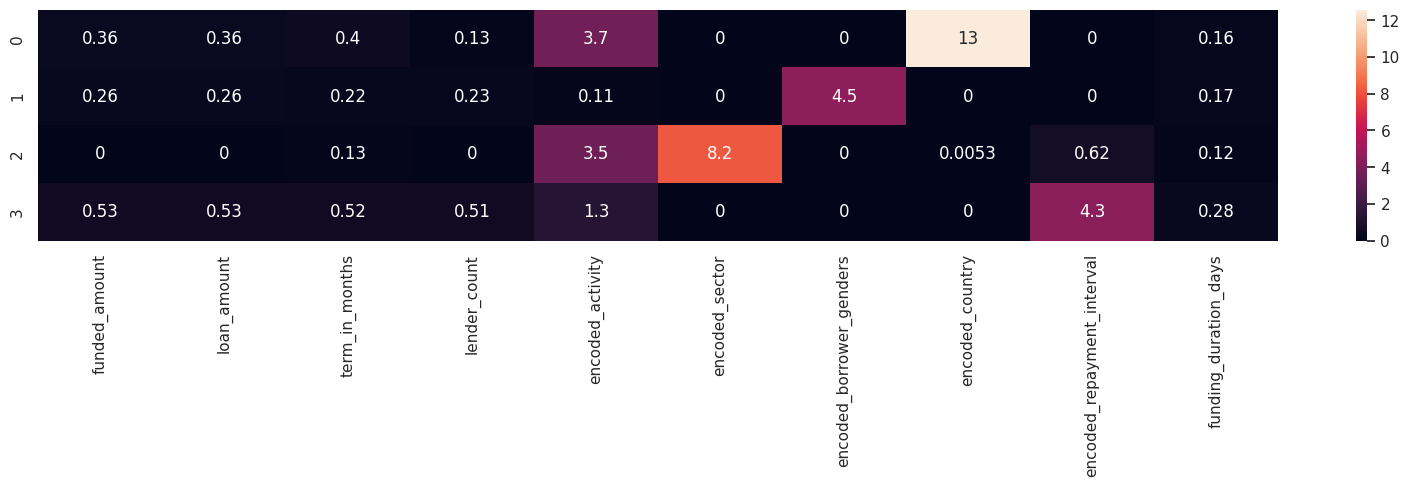

In [75]:
#The 4 datapoints and their correlation with the actual ones
plt.figure(figsize=(20,3))
sns.heatmap(pd.DataFrame(nmf.components_, columns=data_to_cluster.columns), annot=True)

# UMAP (Reduction)

In [76]:

umap_scaler = umap.UMAP()

In [77]:
# Creating embeddings
embeddings = umap_scaler.fit_transform(data_to_cluster_scaled)

<Axes: >

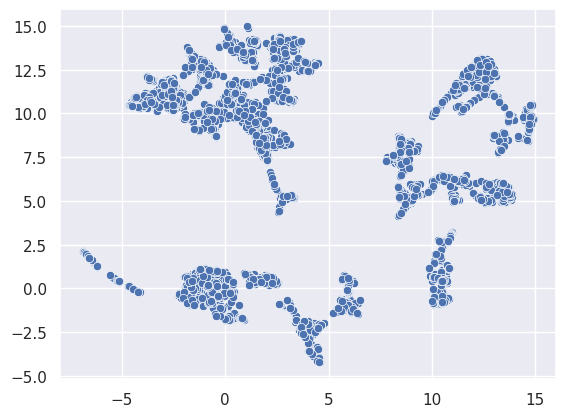

In [78]:
# Plotting the UMAP
sns.scatterplot(x=embeddings[:,0], y=embeddings[:,1])

In [79]:
# Construct a new DataFrame from the embeddings and merge with 'country' columns from the original data
vis_data = pd.DataFrame({
    'x': embeddings[:, 0],         # Assuming embeddings is a 2D array or similar structure
    'y': embeddings[:, 1],
    'country': data_sampled['country']
})

# Create an interactive scatter plot using Altair
chart = alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['country']
).interactive()

chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

# K Clustering

In [80]:
max_iters=100
k = 3

In [81]:
# 1. Initialize the k cluster centroids
centroids = data_reduced_pca[np.random.choice(data_sampled.shape[0], k, replace=False)] # Use data_reduced_pca.shape[0] to get the correct number of samples

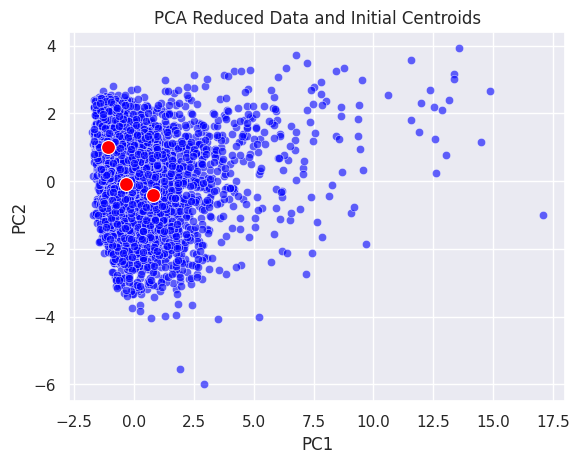

In [82]:
# Plot observations
sns.scatterplot(x=data_reduced_pca[:, 0], y=data_reduced_pca[:, 1], alpha=0.6, color='blue')

# Plot centroids
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', s=100)

plt.title('PCA Reduced Data and Initial Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [83]:
# 2. Assign each data point to the closest centroid
distances = np.linalg.norm(data_reduced_pca - centroids[:, np.newaxis], axis=2)
labels = np.argmin(distances, axis=0)

In [84]:
# 3. Recompute the centroids
new_centroids = np.array([data_reduced_pca[labels == i].mean(axis=0) for i in range(k)])

In [85]:
new_centroids

array([[-0.5889047 , -0.48363391],
       [-0.96876953,  1.03057537],
       [ 1.81039696, -0.53452983]])

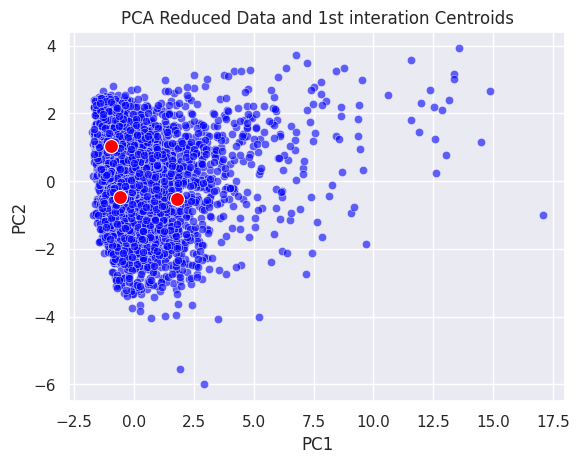

In [86]:
# Plot observations after 1st interation
sns.scatterplot(x=data_reduced_pca[:, 0], y=data_reduced_pca[:, 1], alpha=0.6, color='blue')

# Plot centroids
sns.scatterplot(x=new_centroids[:, 0], y=new_centroids[:, 1], color='red', s=100)

plt.title('PCA Reduced Data and 1st interation Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [87]:
# A simple implementation of K-means
# Iterating the proces 100 times

def k_means_simple(data, k, max_iters=100):
    # 1. Initialize the k cluster centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # 2. Assign each data point to the closest centroid
        distances = np.linalg.norm(data - centroids[:, np.newaxis], axis=2)
        labels = np.argmin(distances, axis=0)

        # 3. Recompute the centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

In [88]:
# Testing the simple k-means
# Finding final centroids from function above
labels, final_centroids = k_means_simple(data_reduced_pca, 3)
print("Cluster centroids:\n", final_centroids)

Cluster centroids:
 [[ 0.18897377 -1.21168714]
 [-0.70186348  0.67573557]
 [ 4.75668386  0.76738782]]


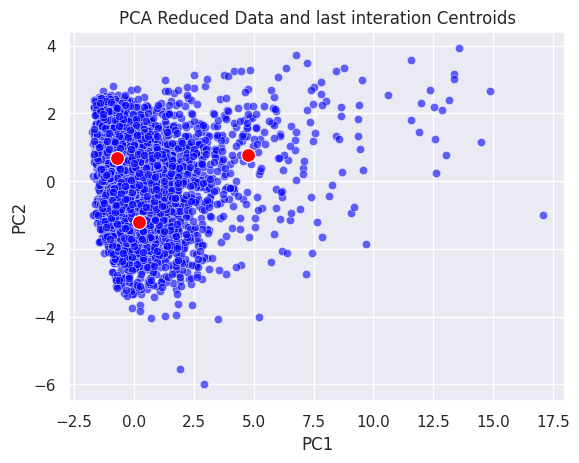

In [89]:
# Ploting after 100 iterations
sns.scatterplot(x=data_reduced_pca[:, 0], y=data_reduced_pca[:, 1], alpha=0.6, color='blue')

# Plot centroids
sns.scatterplot(x=final_centroids[:, 0], y=final_centroids[:, 1], color='red', s=100)

plt.title('PCA Reduced Data and last interation Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [90]:
#Pre-defining clusters, usually after performing Elbow Method
#clusterer = KMeans(n_clusters=3)

In [91]:
# Initializing an empty list to store the sum of squared distances for each 'k'
Sum_of_squared_distances = []

# Define a range for possible cluster values (1 to 9)
K = range(1, 10)

# For each possible 'k', fit a KMeans model and compute the sum of squared distances
for k in K:
    km = KMeans(n_clusters=k, n_init = "auto")               # Initialize the KMeans model with 'k' clusters
    km.fit(data_to_cluster_scaled)          # Fit the model on the scaled data
    Sum_of_squared_distances.append(km.inertia_)  # Append the model's inertia (sum of squared distances) to the list

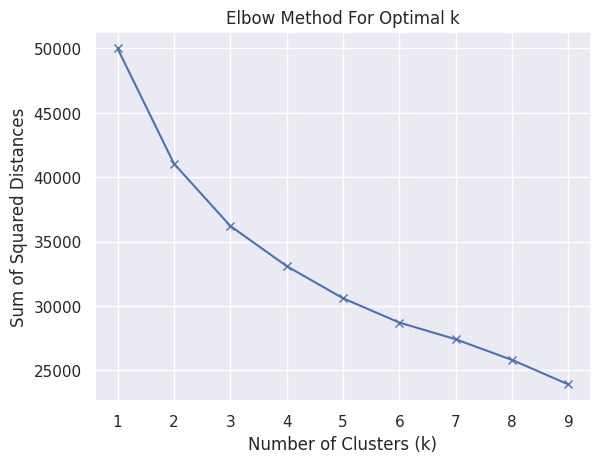

In [92]:
# Plot the sum of squared distances for each 'k' to determine the 'elbow'
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)  # Add a grid for better visualization
plt.show()

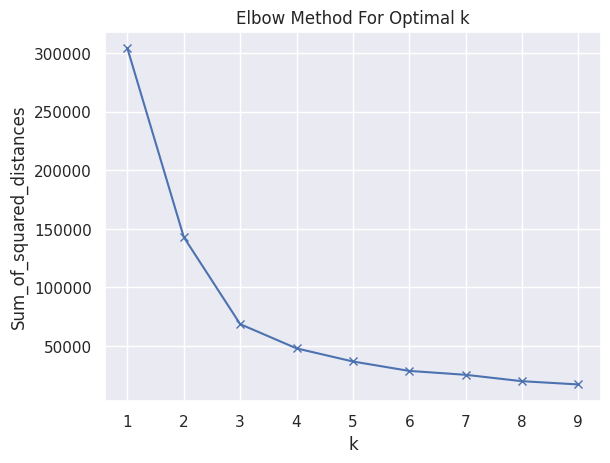

In [93]:
umap_scaler_km = umap.UMAP(n_components=6)
embeddings_km = umap_scaler.fit_transform(data_to_cluster_scaled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, n_init = "auto")
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [94]:
# As shown in elbow method, 3 clusters are optimal for our data
clusterer = KMeans(n_clusters=3)

In [95]:

clusterer.fit(data_to_cluster_scaled)

KMeans(n_clusters=3)

In [96]:
# Copy the cluster-numbers into the original file
data_sampled['cluster'] = clusterer.labels_

In [97]:
#Irrelevant
data_sampled.groupby('cluster').encoded_sector.mean()

,encoded_sector
cluster,
0,5.638889
1,5.613148
2,5.927577


In [98]:
# Preparing for plot
# Reset the index of data_sampled
data_sampled = data_sampled.reset_index()

vis_data = pd.DataFrame(embeddings)
vis_data['country'] = data_sampled['country']
vis_data['cluster'] = data_sampled['cluster']
vis_data['sector'] = data_sampled['sector']
vis_data.columns = ['x', 'y', 'place', 'cluster','country']

In [99]:
#visualization
# UMAP chart
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['place', 'country'],
    color=alt.Color('cluster:N', scale=alt.Scale(scheme='set1')) #use N after the var to tell altair that it's categorical
).interactive()

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

# Hierarical clustering

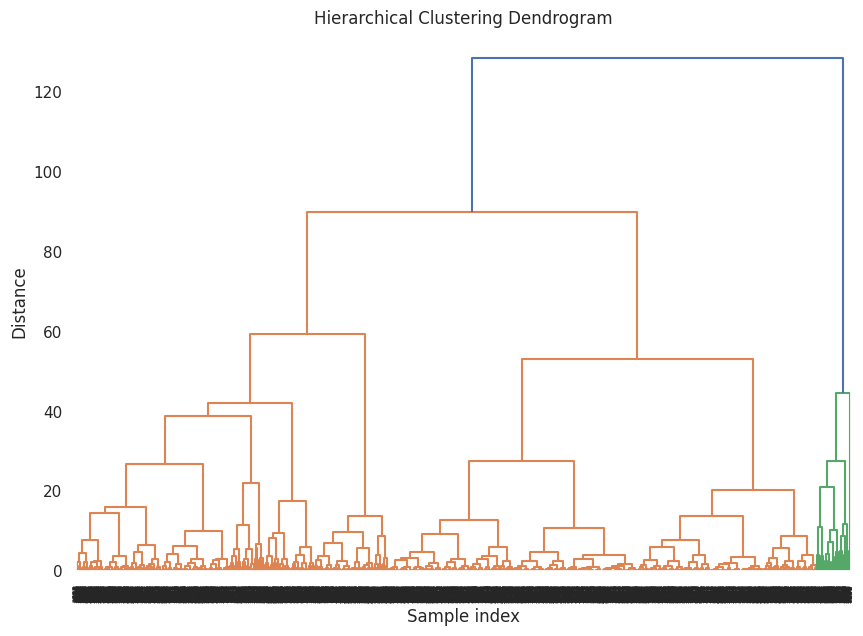

In [100]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


linked = linkage(data_reduced_pca, 'ward')


plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [101]:
from scipy.cluster.hierarchy import fcluster

# Defining
k = 3  # 3 clusters as conducted by elbow
cluster_labels = fcluster(linked, k, criterion='maxclust')


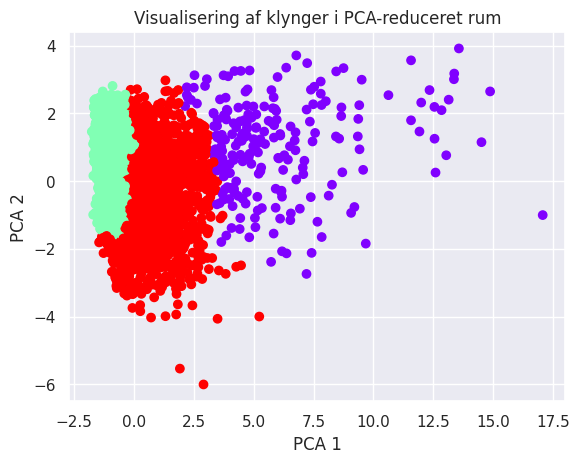

In [102]:
# Building the clusters around PCA
plt.scatter(data_reduced_pca[:, 0], data_reduced_pca[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Visualisering af klynger i PCA-reduceret rum')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


# Recommendation machine

In [103]:
#Using these datapoints


print(data_reduced_nmf[0,:])
print(data_reduced_nmf[1,:])

[0.05261959 0.00675272 0.03218187 0.1619143 ]
[0.04561549 0.00070209 0.01256361 0.07103014]


In [104]:
# Example with np
np.linalg.norm(data_reduced_nmf[0,:] - data_reduced_nmf[1,:])

0.09343700896179301

In [105]:
import math

In [106]:
from sklearn.metrics.pairwise import euclidean_distances

In [107]:
euclidean_matrix = euclidean_distances(data_reduced_nmf)
euclidean_matrix.shape

(5000, 5000)

In [108]:
#Finding the indexes for the 3 datapoints the closest to index 0 (1. datapoint)
np.argsort(euclidean_matrix[0,:])[:3]

array([   0,  842, 1722])

In [109]:
data_sampled[
    (data_sampled['country'] == 'Colombia') &
    (data_sampled['sector'] == 'Services') &
    (data_sampled['activity'] == 'Beauty Salon')
]




,index,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,...,repayment_interval,date,encoded_activity,encoded_sector,encoded_borrower_genders,encoded_country,encoded_repayment_interval,funding_duration,funding_duration_days,cluster
570,194060,1307141,700.0,700.0,Beauty Salon,Services,"buy equipment, such as hair dryers, hair irons...",CO,Colombia,TAME,...,monthly,2017-05-25,10,12,0,15,2,20 days 16:11:32,20.674676,1
1772,25696,678453,750.0,750.0,Beauty Salon,Services,to buy stock and supplies for her hair salon a...,CO,Colombia,Medellín,...,monthly,2014-03-03,10,12,0,15,2,16 days 19:05:34,16.795532,0
3528,7281,1117229,700.0,700.0,Beauty Salon,Services,"to buy chairs, tables, carpets and other thing...",CO,Colombia,Tolu Viejo,...,bullet,2016-07-15,10,12,0,15,0,11 days 21:41:58,11.904144,0
3606,102830,974855,375.0,375.0,Beauty Salon,Services,"to remodel her business, to paint, and to buy ...",CO,Colombia,Sincelejo,...,bullet,2015-11-06,10,12,0,15,0,15 days 07:00:44,15.292176,0
4410,335,1110434,400.0,400.0,Beauty Salon,Services,to purchase a display case and a bigger variet...,CO,Colombia,Bogotá,...,monthly,2016-07-01,10,12,0,15,2,33 days 16:56:07,33.705637,1


In [110]:
#The datapoints that are the closest to index number x
ixs = np.argsort(euclidean_matrix[43,:])[:10]
print(data_sampled['country'][ixs])

43          Cambodia
1158      Kyrgyzstan
2205          Zambia
3222        Pakistan
724            Kenya
916       Tajikistan
4282    Sierra Leone
3921       Palestine
1785        Honduras
338             Peru
Name: country, dtype: object


In [111]:
#Finding the first datapoint that has a specific sector in it and then returning the datapoints which has the cloest euclidean distance to this point
def recommender_sector(sector, n_recs):
  if sector in list(set(data_sampled.sector)):
    ix = data_sampled[data_sampled['sector']==sector].index[0]
    ixs = np.argsort(euclidean_matrix[ix,:])[1:n_recs+1:]
    return data_sampled['sector'][ixs]
  else:
    return 'Place not in the dataset'

In [112]:
recommender_sector('Food', 9)

,sector
4546,Clothing
3994,Education
1095,Retail
3495,Services
838,Clothing
4186,Personal Use
2645,Food
2558,Agriculture
2495,Agriculture


In [113]:
def recommender(sector, country, activity, n_recs=1, method='median'):
    # Starter med det mest specifikke filter
    filters = [
        (data_sampled['sector'] == sector) & (data_sampled['country'] == country) & (data_sampled['activity'] == activity),
        (data_sampled['sector'] == sector) & (data_sampled['country'] == country),
        (data_sampled['sector'] == sector)
    ]

    for filter in filters:
        filtered_data = data_sampled[filter]
        if len(filtered_data) >= n_recs:
            if method == 'median':
                return filtered_data['loan_amount'].median()
            else:
                return filtered_data['loan_amount'].mean()

    return "Ikke nok data til at give anbefalinger."
print(recommender('Food', 'Kenya', 'Farming', 10))


300.0


In [114]:


def recommender(sector, country, n_recs=1, method='median'):
    # Filtrer datarammen baseret på 'sector' og 'country'
    filtered_data = data_sampled[
        (data_sampled['sector'] == sector) &
        (data_sampled['country'] == country)
    ]

    # Tjek om der er tilstrækkelige data efter filtrering
    if len(filtered_data) < n_recs:
        return "Ikke nok data til at give anbefalinger."

    # Beregn anbefalet lånebeløb baseret på den angivne metode (median eller mean)
    if method == 'median':
        recommended_amount = filtered_data['loan_amount'].median()
    else:
        recommended_amount = filtered_data['loan_amount'].mean()

    return recommended_amount

# Eksempel på anvendelse af funktionen
print(recommender('Agriculture', 'Kenya', 10, method='median'))

400.0


In [115]:
# Install and import of gradio
!pip install gradio -q
import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.5 MB/s eta 0:00:00


In [117]:
# Install and import of gradio
!pip install gradio -q
import gradio as gr

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Sampled dataset named 'data_sampled'
# Assuming data_sampled contains columns: 'sector', 'country', 'activity', 'loan_amount', and 'funding_duration_days'

# Recommender loan function
def create_loan_recommender(data_sampled):
    # Combine relevant features
    data_sampled.loc[:, 'combined_features'] = data_sampled[['sector', 'country', 'activity']].agg(' '.join, axis=1)

    # Use TF-IDF for text-based features
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(data_sampled['combined_features'])

    # Normalize funding duration
    scaler = MinMaxScaler()
    funding_duration_normalized = scaler.fit_transform(data_sampled[['funding_duration_days']])

    # Combine TF-IDF matrix with duration
    feature_matrix = np.hstack((tfidf_matrix.toarray(), funding_duration_normalized))

    return tfidf, scaler, feature_matrix

# Predict loan amount function
def predict_loan_amount(sector, country, activity, funding_duration_days, data_sampled, tfidf, scaler, feature_matrix, n=5):
    input_features = f"{sector} {country} {activity}"
    input_tfidf = tfidf.transform([input_features])
    input_duration = scaler.transform([[funding_duration_days]])

    # Combine input features
    input_combined = np.hstack((input_tfidf.toarray(), input_duration))

    # Calculate cosine similarity between input and existing data
    sim_scores = cosine_similarity(input_combined, feature_matrix)[0]

    # Find the loans that are closest to the inputted
    similar_indices = sim_scores.argsort()[::-1][:n]
    similar_loans = data_sampled.iloc[similar_indices]

    # Predict loan amount based on similar loans
    predicted_loan_amount = similar_loans['loan_amount'].mean()

    return predicted_loan_amount, similar_loans[['sector', 'country', 'activity', 'loan_amount', 'funding_duration_days']]

# Create recommender using data_sampled
tfidf, scaler, feature_matrix = create_loan_recommender(data_sampled)

# Extract options for dropdown menus from the dataframe
sector_options = data_sampled['sector'].unique().tolist()
country_options = data_sampled['country'].unique().tolist()
activity_options = data_sampled['activity'].unique().tolist()

# Definition of the Gradio interface
def recommend_loan(sector, country, activity, funding_duration_days):
    predicted_amount, similar_loans = predict_loan_amount(sector, country, activity, funding_duration_days, data_sampled, tfidf, scaler, feature_matrix)
    return f"Predicted Loan Amount: {predicted_amount}", similar_loans


# Define Gradio input/output components
inputs = [
    gr.Dropdown(choices=sector_options, label="Sector"),
    gr.Dropdown(choices=country_options, label="Country"),
    gr.Dropdown(choices=activity_options, label="Activity"),
    gr.Number(label="Funding Duration (Days)")
]

outputs = [
    gr.Text(label="Predicted Loan Amount"),
    gr.Dataframe(label="Similar Loans")  # Showing the similar loans DataFrame as output
]

# Create the Gradio interface
interface = gr.Interface(fn=recommend_loan, inputs=inputs, outputs=outputs, title="Loan Recommender System")

# Launch the Gradio interface
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://891f733421b9cc09a8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
